In [23]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np   # 배열 사용할 때 numpy
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(512, 512, 3)


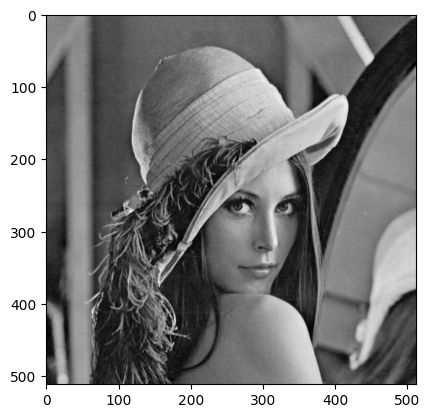

In [24]:
img = cv2.imread('/content/gdrive/My Drive/images/lena.jpg')
print(img.shape)
gimg1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gimg1, cmap='gray')

In [25]:
def saturation(val):
  if val > 255:
    return 255
  elif val < 0:
    return 0
  else:
    return val

In [26]:
gPoint = np.zeros((gimg1.shape[0], gimg1.shape[1]), dtype=np.ubyte)

역 변환 실습

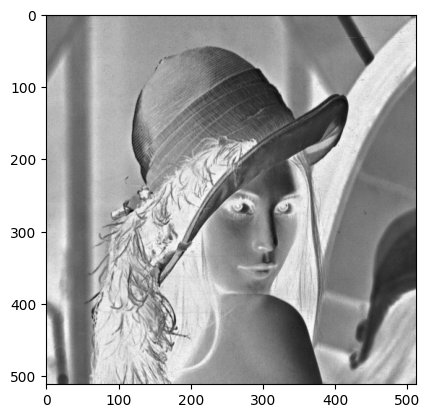

In [27]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    pointVal = 255 - np.int32(gimg1[h,w])
    gPoint[h,w] = saturation(pointVal)

plt.imshow(gPoint, cmap='gray')

이진화

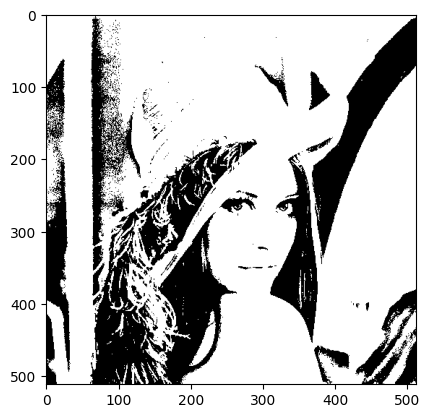

In [28]:
th = 80

for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    if gimg1[h,w] > th:
      gPoint[h,w] = 255
    else:
      gPoint[h,w] = 0

plt.imshow(gPoint, cmap='gray')

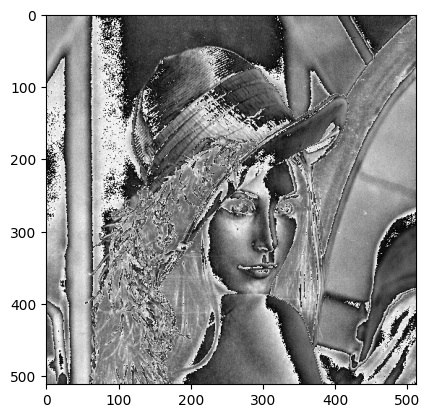

In [30]:
num0fClip = 3
modVal = 256/num0fClip

for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    pointVal = np.int32(gimg1[h,w]) % modVal
    gPoint[h,w] = saturation(pointVal * num0fClip)


plt.imshow(gPoint, cmap='gray', vmin=0, vmax=255)